# Fashion MNIST Classification with SVM and Cross-Validation

In this notebook, we use the Fashion MNIST dataset and apply SVMs with different kernel types and hyperparameters to determine the best-performing classifier. We will use cross-validation for model selection, analyzing both training and validation errors across several configurations.

## Task Breakdown

### Part A: Load and Preprocess the Data
1. We load 7,000 samples from the Fashion MNIST dataset.
2. Each image, originally a 28x28 matrix, is flattened into a vector of 784 features.

### Part B: Visualize the Data
1. We display the first 10 images from our sample along with their class labels.
2. Each image is reshaped back to its 28x28 dimensions for display.

### Part C: Define `SVM_results` Function
1. **Inputs**: This function accepts training and test datasets and a range of SVM configurations.
2. **Implementation**:
   - We use `cross_validation_error()` with 4-fold cross-validation to evaluate the SVM models.
   - We iterate over a combination of kernels and hyperparameters, logging errors for each configuration.

### Part D: Data Splitting and Model Evaluation
1. We split the data into training and test sets.
2. Using `SVM_results`, we calculate average training, validation, and test errors for each SVM configuration.
3. A bar plot visualizes these errors, comparing different models' performance.

### Analysis
- Based on the plot, we select the best model according to cross-validation and test errors, comparing the outcomes to assess model generalization.

---

### Part A: Load Data




In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

# Load 7000 random samples from Fashion MNIST dataset
def fetch_mnist():
    X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
    X = X.to_numpy()
    y = y.to_numpy()

    np.random.seed(2)
    indices = np.random.choice(len(X), 7000, replace=False)
    X, y = X[indices], y[indices]
    return X, y

X, y = fetch_mnist()
print(X.shape, y.shape)

C:\Users\shaha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(7000, 784) (7000,)


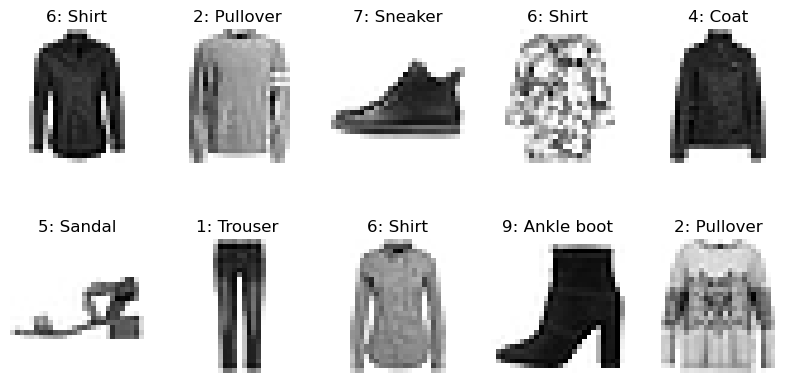

In [2]:
import matplotlib.pyplot as plt

# Class labels
idx2class = {
    '0': 'T-shirt/top', '1': 'Trouser', '2': 'Pullover', '3': 'Dress', '4': 'Coat',
    '5': 'Sandal', '6': 'Shirt', '7': 'Sneaker', '8': 'Bag', '9': 'Ankle boot'
}

# Display first 10 images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.set_title(f"{y[i]}: {idx2class[str(y[i])]}")
    ax.axis('off')
plt.show()


In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Function for 4-fold cross-validation error (no sklearn cross_val_score)
def cross_validation_error(X, y, model, folds=4):
    n = len(X)
    indices = np.arange(n)
    np.random.shuffle(indices)
    fold_size = n // folds
    errors_train, errors_val = [], []

    for i in range(folds):
        val_indices = indices[i * fold_size:(i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        X_train, y_train = X[train_indices], y[train_indices]
        X_val, y_val = X[val_indices], y[val_indices]

        model.fit(X_train, y_train)
        errors_train.append(1 - model.score(X_train, y_train))
        errors_val.append(1 - model.score(X_val, y_val))
    
    return np.mean(errors_train), np.mean(errors_val)

# SVM results function
def SVM_results(X_train, y_train, X_test, y_test):
    results = {}

    # Linear kernel
    model = SVC(kernel='linear')
    avg_train_error, avg_val_error = cross_validation_error(X_train, y_train, model)
    model.fit(X_train, y_train)
    test_error = 1 - model.score(X_test, y_test)
    results['linear_SVM'] = (avg_train_error, avg_val_error, test_error)

    # Polynomial kernel with various degrees
    for degree in [2, 4, 6, 8]:
        model = SVC(kernel='poly', degree=degree)
        avg_train_error, avg_val_error = cross_validation_error(X_train, y_train, model)
        model.fit(X_train, y_train)
        test_error = 1 - model.score(X_test, y_test)
        results[f'{degree}_poly_SVM'] = (avg_train_error, avg_val_error, test_error)

    # RBF kernel with various gamma values
    for gamma in [0.001, 0.01, 0.1, 1.0, 10]:
        model = SVC(kernel='rbf', gamma=gamma)
        avg_train_error, avg_val_error = cross_validation_error(X_train, y_train, model)
        model.fit(X_train, y_train)
        test_error = 1 - model.score(X_test, y_test)
        results[f'{gamma}_rbf_SVM'] = (avg_train_error, avg_val_error, test_error)

    return results


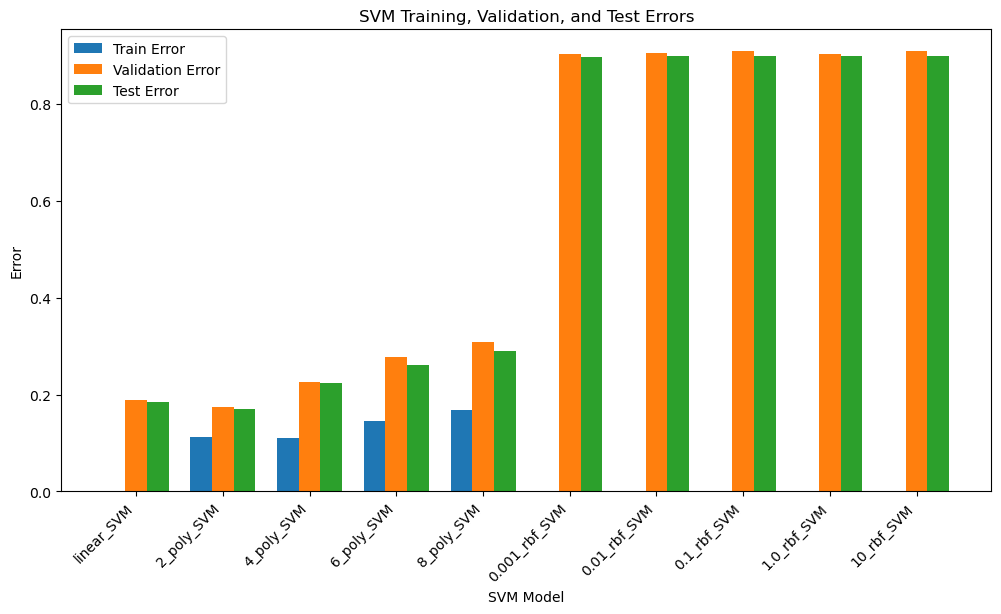

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Run SVM results
results = SVM_results(X_train, y_train, X_test, y_test)

# Plot results
train_errors = [v[0] for v in results.values()]
val_errors = [v[1] for v in results.values()]
test_errors = [v[2] for v in results.values()]
labels = list(results.keys())

# Plotting
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, train_errors, width, label='Train Error')
ax.bar(x, val_errors, width, label='Validation Error')
ax.bar(x + width, test_errors, width, label='Test Error')

ax.set_xlabel('SVM Model')
ax.set_ylabel('Error')
ax.set_title('SVM Training, Validation, and Test Errors')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
plt.show()
